In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [282]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
riders_data = pd.read_csv('Riders.csv')

In [357]:
train_df = train_data.copy()

In [358]:
train_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [359]:
train_df = train_df[['Distance (KM)', 'Time from Pickup to Arrival']]

In [360]:
train_df

,Distance (KM),Time from Pickup to Arrival
0,4,745
1,16,1993
2,3,455
3,9,1341
4,9,1214
...,...,...
21196,3,9
21197,7,770
21198,20,2953
21199,13,1380


In [361]:
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [362]:
print(x)
print(y)

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]]
[ 745 1993  455 ... 2953 1380 2128]


In [363]:
x = x.reshape(len(x), 1)
print(x)

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]]


In [364]:
y = y.reshape(len(y), 1)
y

array([[ 745],
       [1993],
       [ 455],
       ...,
       [2953],
       [1380],
       [2128]], dtype=int64)

In [365]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-0.97137039]
 [ 1.14546888]
 [-1.14777366]
 ...
 [ 1.85108197]
 [ 0.61625906]
 [ 0.43985579]]
[[-0.82240871]
 [ 0.44171198]
 [-1.11615471]
 ...
 [ 1.41411252]
 [-0.17920627]
 [ 0.57845581]]


## Linear

In [377]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict

In [397]:
predicts_lin = sc_y.inverse_transform(regressor.predict(sc_X.transform(x)))
predicts_lin

array([[497.44770224],
       [711.49191969],
       [479.61068412],
       ...,
       [782.83999217],
       [657.98086533],
       [640.14384721]])

### RMSE Linear

In [400]:
from sklearn import metrics
print("RMSE: ", np.sqrt(mean_squared_error(y,predicts_lin)))
print(metrics.mean_squared_error(y, predicts_lin))

RMSE:  604.0926975240304
364927.9872018597


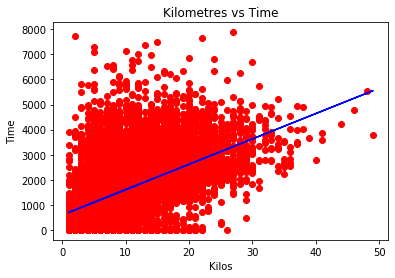

In [369]:
plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title('Kilometres vs Time')
plt.xlabel('Kilos')
plt.ylabel('Time')
plt.show()

## SVR

In [384]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x, y)

C:\Users\The Bois\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [385]:
predicts = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(x)))
predicts

array([461.93800303, 440.85086481, 478.74420643, ..., 494.37518626,
       418.06919975, 414.20649957])

### RMSE SVR

In [395]:
from sklearn import metrics
print("RMSE: ", np.sqrt(mean_squared_error(y,predicts)))
print(metrics.mean_squared_error(y, predicts))

RMSE:  448.35600656558495
201023.10862343883


## Ensembling

### Voting

In [376]:
from sklearn.ensemble import VotingRegressor

In [410]:
models = [("regressor",regressor), ("SVR",svr_regressor)]
model_weightings = np.array([0.1,0.9])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)


In [411]:
v_reg.fit(x,y[:,0])

VotingRegressor(estimators=[('regressor',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('SVR',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=array([0.1, 0.9]))

In [412]:
y_pred = sc_y.inverse_transform(v_reg.predict(sc_X.transform(x)))
y_pred

array([465.48897295, 467.9149703 , 478.8308542 , ..., 523.22166685,
       442.06036631, 436.80023433])

In [394]:
# 0.3  and 0.7

print("RMSE: ", np.sqrt(mean_squared_error(y,y_pred)))
print(metrics.mean_squared_error(y, y_pred))

RMSE:  493.50430793867514
243546.50195403068


In [404]:
# 0.5 and 0.5
print("RMSE: ", np.sqrt(mean_squared_error(y,y_pred)))
print(metrics.mean_squared_error(y, y_pred))

RMSE:  524.4627523245309
275061.1785758223


In [409]:
#  0.7  and 0.3
print("RMSE: ", np.sqrt(mean_squared_error(y,y_pred)))
print(metrics.mean_squared_error(y, y_pred))

RMSE:  555.9752273126916
309108.453385399


In [413]:
# 0.1 and 0.9
print("RMSE: ", np.sqrt(mean_squared_error(y,y_pred)))
print(metrics.mean_squared_error(y, y_pred))

RMSE:  463.21099244299376
214564.4235200232


## Homogenous Ensembles

### Bagging

In [430]:
from sklearn.ensemble import BaggingRegressor

In [431]:
d_tree = DecisionTreeRegressor(max_depth=4)

In [432]:
bag_reg = BaggingRegressor(base_estimator = d_tree)

In [434]:
bag_reg.fit(x,y[:,0])

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=4,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [444]:
predict_dec = sc_y.inverse_transform(bag_reg.predict(sc_X.transform(x)))  #bag_reg.predict(x)
print("RMSE: ", np.sqrt(mean_squared_error(y,predict_dec)))
print(metrics.mean_squared_error(y, predict_dec))

RMSE:  564.4598669593845
318614.941407806


### Boosting

In [445]:
from sklearn.ensemble import AdaBoostRegressor

In [446]:
d_tree_boost = DecisionTreeRegressor(max_depth=3)
bst_reg = AdaBoostRegressor(base_estimator = d_tree_boost)

In [448]:
bst_reg.fit(x,y[:,0])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_s

In [452]:
boost_pred = sc_y.inverse_transform(bst_reg.predict(sc_X.transform(x)))
print("RMSE: ", np.sqrt(mean_squared_error(y, boost_pred)))
print(metrics.mean_squared_error(y, boost_pred))

RMSE:  745.3228253116571
555506.1139305509
